In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)

In [4]:
df_data = pd.read_csv('/content/drive/MyDrive/IndianAgriculture.csv') #indepdent varaiables
df_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
unique_states = df_data['State_Name'].unique()
print(unique_states)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [6]:
print(df_data.drop(df_data[df_data.State_Name.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.District_Name.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.Crop.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.Season.str.contains(r'[^0-9a-zA-Z]')].index))


Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production]
Index: []


In [7]:
#df_data['Season]'] = df['genres'].str.replace(r'\D', '')
#df_data['Crop'] = df['genres'].str.replace(r'\D', '')
df_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [8]:

df_data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
df_data = df_data.dropna()

In [10]:
df_data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
df_data = df_data.drop_duplicates()

                                     ** Initial EDA and data preparation.**

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [13]:
df_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [14]:
df_data.sample(100)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
51163,Chhattisgarh,KABIRDHAM,2007,Rabi,Wheat,5467.0,4529.0
55141,Chhattisgarh,RAIPUR,2012,Rabi,Rapeseed &Mustard,830.0,425.0
104122,Madhya Pradesh,BARWANI,2012,Whole Year,Potato,9.0,254.0
161230,Puducherry,YANAM,2010,Rabi,Moong(Green Gram),13.0,7.0
229232,Uttar Pradesh,SITAPUR,2002,Rabi,Maize,117.0,130.0
...,...,...,...,...,...,...,...
63673,Gujarat,SABAR KANTHA,2000,Kharif,Other Kharif pulses,1000.0,400.0
177521,Sikkim,WEST DISTRICT,2001,Kharif,Urad,1700.0,1240.0
54475,Chhattisgarh,RAIGARH,2010,Whole Year,Garlic,82.0,237.0
239607,West Bengal,COOCHBEHAR,2010,Summer,Maize,4391.0,26465.0


In [15]:
df_data.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [16]:
# Look for cells with missing data (i.e. Null or NA)
df_data.isna().any().any()

False

In [17]:
# count the number of missing data for each feature
df_data.isna().sum()
#df_data
# this will show only features that have nonzero missing values
###df_data = df_data[df_data!=0]

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [18]:
df_data.sort_values(by= ['Crop_Year'], ascending = True)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
64403,Gujarat,SURENDRANAGAR,1997,Rabi,Wheat,22500.0,46800.0
236503,West Bengal,24 PARAGANAS NORTH,1997,Whole Year,Turmeric,820.0,1701.0
236504,West Bengal,24 PARAGANAS NORTH,1997,Winter,Rice,193202.0,381990.0
84376,Karnataka,CHITRADURGA,1997,Whole Year,Turmeric,3.0,17.0
84375,Karnataka,CHITRADURGA,1997,Whole Year,Sugarcane,8378.0,827746.0
...,...,...,...,...,...,...,...
156699,Odisha,MAYURBHANJ,2015,Winter,Maize,40.0,96.1
156700,Odisha,MAYURBHANJ,2015,Winter,Moong(Green Gram),55.0,17.3
156701,Odisha,MAYURBHANJ,2015,Winter,Potato,48.0,400.1
156703,Odisha,MAYURBHANJ,2015,Winter,Rice,278000.0,274000.0


In [19]:
df_data.describe()


,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


                                    **Data** **Visualisation**

<Axes: >

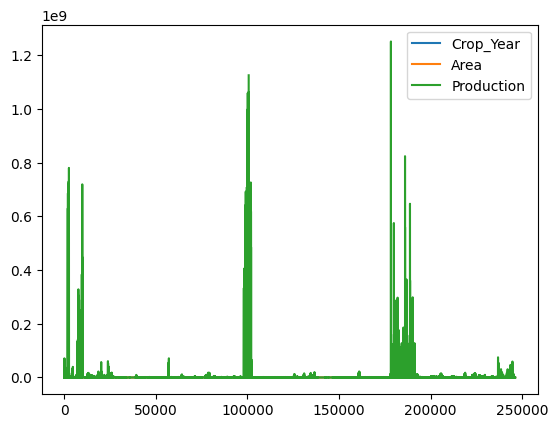

In [20]:
data_vis = pd.read_csv('/content/drive/MyDrive/IndianAgriculture.csv')
data_vis.plot()


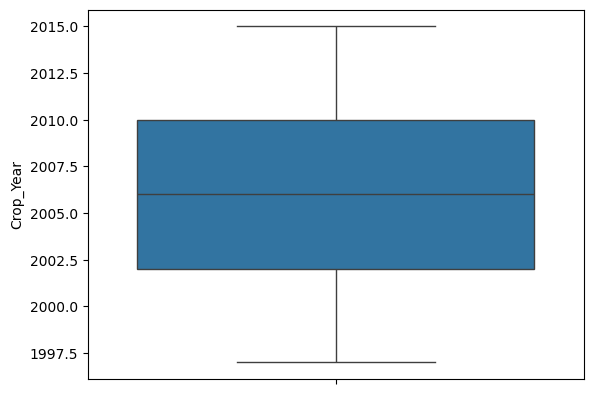

In [21]:
for i in df_data[['Crop_Year']]:
    plt.figure()
    sns.boxplot(df_data[i])

In [22]:
df_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [23]:
for i in df_data:
    print(i ,': ', df_data[i].nunique())

State_Name :  33
District_Name :  646
Crop_Year :  19
Season :  6
Crop :  124
Area :  38391
Production :  51627


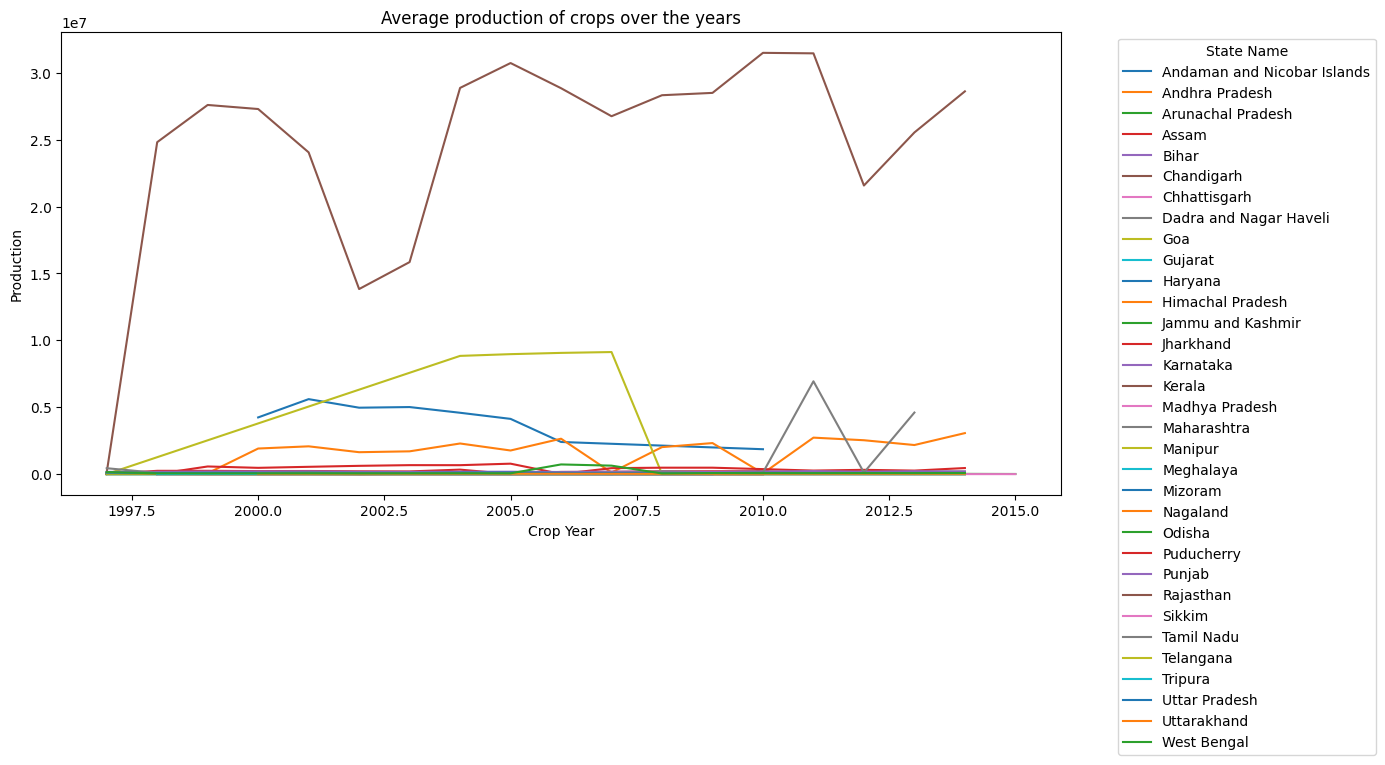

In [24]:
State_name = df_data[['State_Name', 'Crop_Year', 'Production']].groupby(['State_Name', 'Crop_Year']).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.title('Average production of crops over the years')

# Plotting individual line plots for each state
for state in State_name['State_Name'].unique():
    state_data = State_name[State_name['State_Name'] == state]
    sns.lineplot(x='Crop_Year', y='Production', data=state_data, label=state)

plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.legend(title='State Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<ipython-input-25-9e1c091fae73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Year', y='Production', data=state_data, label=state, ci=None)
<ipython-input-25-9e1c091fae73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Year', y='Production', data=state_data, label=state, ci=None)
<ipython-input-25-9e1c091fae73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Year', y='Production', data=state_data, label=state, ci=None)
<ipython-input-25-9e1c091fae73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Year', y='Production', data=state_data, label=state, ci=None)
<ipython-input-25-9e1c091fae73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Ye

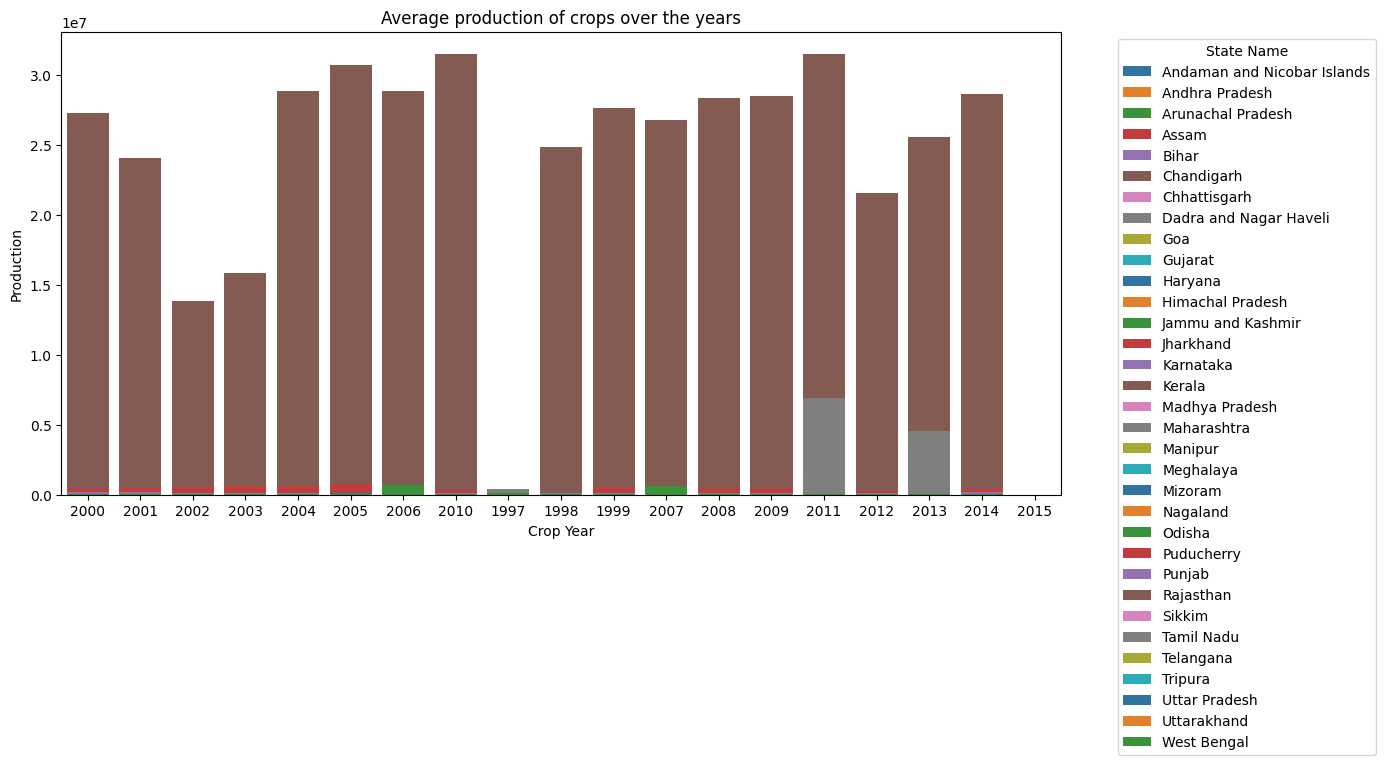

In [25]:
State_name = df_data[['State_Name', 'Crop_Year', 'Production']].groupby(['State_Name', 'Crop_Year']).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.title('Average production of crops over the years')

# Plotting individual bar plots for each state
for state in State_name['State_Name'].unique():
    state_data = State_name[State_name['State_Name'] == state]
    sns.barplot(x='Crop_Year', y='Production', data=state_data, label=state, ci=None)

plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.legend(title='State Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

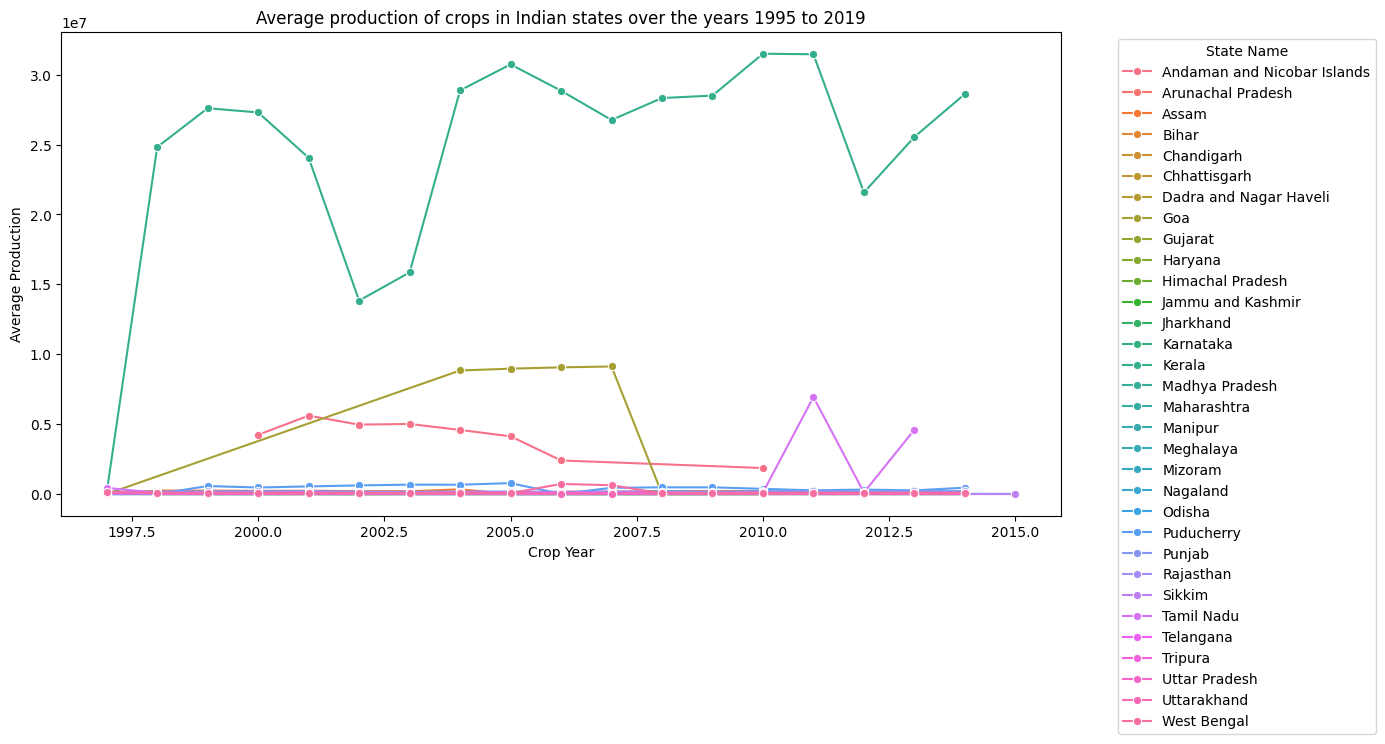

In [28]:

# Assuming df_data is your DataFrame with columns 'State_Name', 'Crop_Year', and 'Production'
State_name = df_data[['State_Name', 'Crop_Year', 'Production']].groupby(['State_Name', 'Crop_Year']).mean().reset_index()

# Filter data to include only Indian states
Indian_states = State_name[State_name['State_Name'].isin(['Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ',
 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Uttar Pradesh',
 'Uttarakhand', 'West Bengal'])]

# Plotting average production of crops over the years for each Indian state
plt.figure(figsize=(14, 7))
plt.title('Average production of crops in Indian states over the years 1995 to 2019')

sns.lineplot(data=Indian_states, x='Crop_Year', y='Production', hue='State_Name', marker='o')

plt.xlabel('Crop Year')
plt.ylabel('Average Production')
plt.legend(title='State Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



In [27]:
import plotly.express as px

# Assuming df_data is your DataFrame with columns 'State_Name', 'Crop_Year', and 'Production'
State_name = df_data[['State_Name', 'Crop_Year', 'Production']].groupby(['State_Name', 'Crop_Year']).mean().reset_index()

# Filter data to include only Indian states
Indian_states = State_name[State_name['State_Name'].isin(['Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ',
 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Uttar Pradesh',
 'Uttarakhand', 'West Bengal'])]

fig = px.choropleth(data_frame=Indian_states,
                    locations="State_Name",
                    locationmode=None,
                    animation_frame="Crop_Year",
                    color='Production',
                    color_continuous_scale='Turbo',
                    title="Average production of crops in Indian states over the years 1995 to 2019")  # Specify the scope as "india"

fig.show()
